# Forest fires

https://archive.ics.uci.edu/ml/datasets/Forest+Fires

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

## Attribute Information:

1. **X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. **Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. **month** - month of the year: 'jan' to 'dec' 
4. **day** - day of the week: 'mon' to 'sun' 
5. **FFMC** - FFMC index from the FWI system: 18.7 to 96.20 
6. **DMC** - DMC index from the FWI system: 1.1 to 291.3 
7. **DC** - DC index from the FWI system: 7.9 to 860.6 
8. **ISI** - ISI index from the FWI system: 0.0 to 56.10 
9. **temp** - temperature in Celsius degrees: 2.2 to 33.30 
10. **RH** - relative humidity in %: 15.0 to 100 
11. **wind** - wind speed in km/h: 0.40 to 9.40 
12. **rain** - outside rain in mm/m2 : 0.0 to 6.4 
13. **area** - the burned area of the forest (in ha): 0.00 to 1090.84

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('data/forestfires.csv')
print(data.shape)
data.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [13]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [18]:
categorical_columns = ['month', 'day']

for c in categorical_columns:
    print(data[c].unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [19]:
data[categorical_columns].describe()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


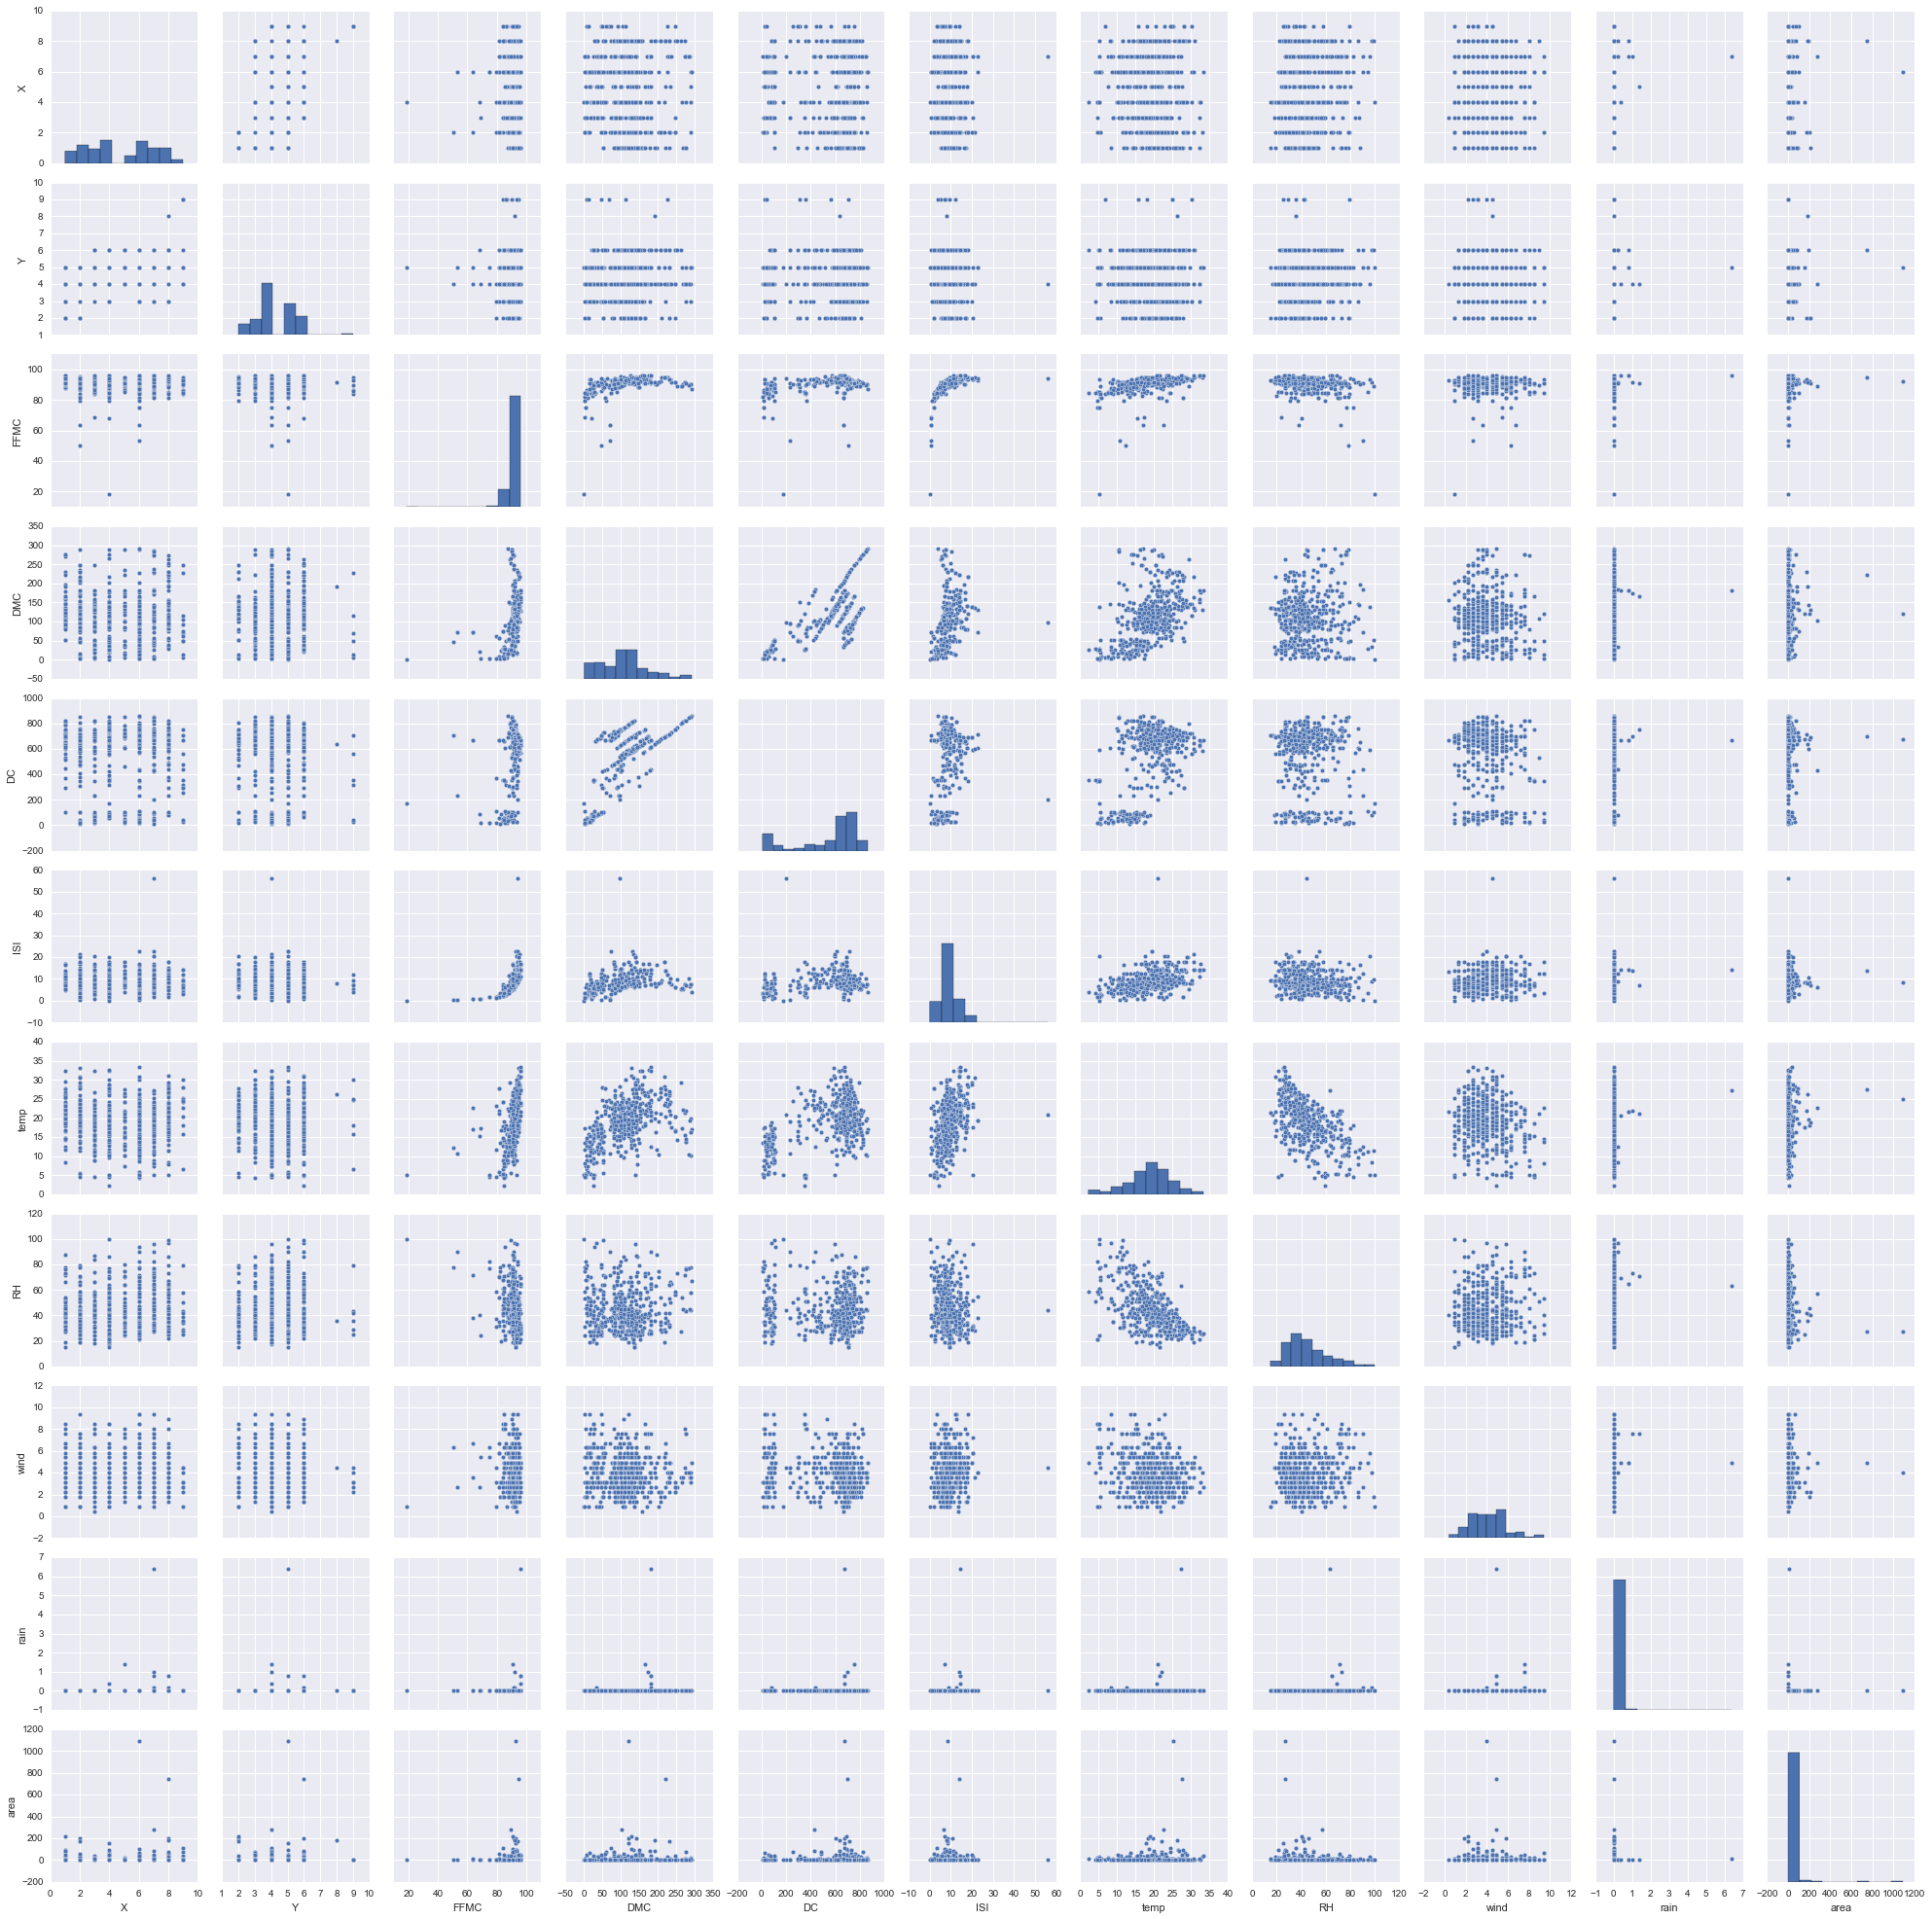

In [20]:
sns.pairplot(data)

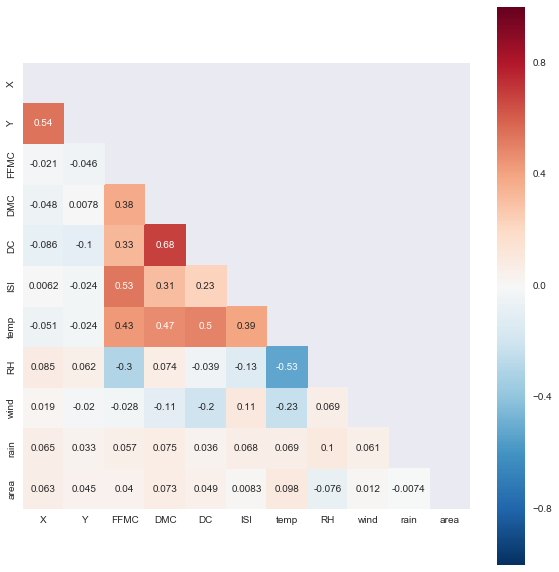

In [34]:
plt.subplots(figsize=(10,10))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, annot=True, mask=mask)

In [36]:
# Проверим есть ли пропуски.
data.count(axis=0)

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

# Категориальные признаки

1. One-hot-encoding - создаём разреженую матрицу, где в столбцах будут категориальные признаки, а в  ячейках - 0 или 1
2. Кодировать категории числами. Не понятно почему был выбран определенный порядок.
3. Кодировать частотами целевой переменной(бинарная классификация) или средним(медианой, модой) целевой переменной(регрессия)

In [59]:
# Для BaseLine попробуем one hot.

X = data.drop(['area'], axis=1)
y = data['area']

X = pd.get_dummies(X, columns=categorical_columns)
X.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [60]:
X_one_hot.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0


# Разбиение на тестовую и обучающую выборки

In [138]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(413, 29)
(104, 29)


# Алгоритмы машинного обучения (регрессии)

|Метод|Класс|
|---|---|
|kNN – kk ближайших соседей|	sklearn.neighbors.KNeighborsRegressor
|LDA – линейный дискриминантный анализ|	sklearn.lda.LDA
|QDA – квадратичный дискриминантный анализ|	sklearn.qda.QDA
|Logistic – логистическая регрессия|	sklearn.linear_model.LogisticRegression
|SVC – машина опорных векторов|	sklearn.svm.SVR
|Tree – деревья решений|	sklearn.tree.DecisionTreeClassifier
|RF – случайный лес|	sklearn.ensemble.RandomForestClassifier
|AdaBoost – адаптивный бустинг|	sklearn.ensemble.AdaBoostClassifier
|GBT – градиентный бустинг деревьев решений|	sklearn.ensemble.GradientBoostingClassifier

# Валидация

Методы машинного обучения есть суть минимизации ошибки предсказания.
Для оценки качества модели используют функции потерь.
В случае с регрессией интуитивно можно предположить, что нам надо оценивать на сколько сильно наши предсказания отклоняются от реальности.

## Метрики качества используемые в регрессиях

- mean_squared_error - The best value is 0.0 $$MSE(y, \hat{y})=\frac{1}{n} \sum_{i=0}^n{(y_i-\hat{y}_i)^2}$$
- mean_absolute_error - The best value is 0.0 $$MAE(y, \hat{y})=\frac{1}{n} \sum_{i=0}^n{|y_i-\hat{y}_i|}$$
- explained_variance_score - Best possible score is 1.0, lower values are worse. $$ev(y, \hat{y})=1-\frac{Var(y-\hat{y})}{Var(y)}$$
- r2_score - Best possible score is 1.0 and it can be negative. A сonstant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0. $$R^2(y,\hat{y})=1-\frac{\sum_{i=0}^n{(y_i-\hat{y}_i)^2}}{\sum_{i=0}^n{(y_i-\overline{y}_i)^2}}, \overline{y} = \frac{1}{n}\sum_{i=0}^{n-1}{y_i}$$

## Кроссвалидация по фолдам

Готовую модель предсказаний проверяют на тестовой выборке. Возникает вопрос, на каких именно данных проверять, если у нас есть только обучающие данные? Для объективной верификации используют кросс-валидацию, т.е. тесты проводятся много раз по случайным разбиениям тренировочных данных.
То как выбирать подвыборки определяет стратегия разбиений в пакете `sklearn.model_selection`: `KFold`, `StratifiedKFold`, `ShuffleSplit`и так далее.

# kNN

In [236]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [117]:
from sklearn.model_selection import cross_val_score

def score(reg, x, y):
    metrcis = [('MSE', 'neg_mean_squared_error'), ('MAE', 'neg_mean_absolute_error'), ('R2', 'r2')]

    for m in metrcis:
        scores = cross_val_score(reg, x, y, cv=5, scoring=m[1])
        print('{}: {}\tstd: {}'.format(m[0],np.mean(scores), np.std(scores) * 2))

In [237]:
score(knn, X_train, y_train)

MSE: -619.1605508585366	std: 325.90916966455467
MAE: -12.571474796747967	std: 1.7789679505367577
R2: -0.23867663539689654	std: 0.2746513803472235


In [125]:
def plot_predict(reg, X_test, y_test):
    pred = reg.predict(X_test)
    plt.scatter(x=pred, y=y_test)

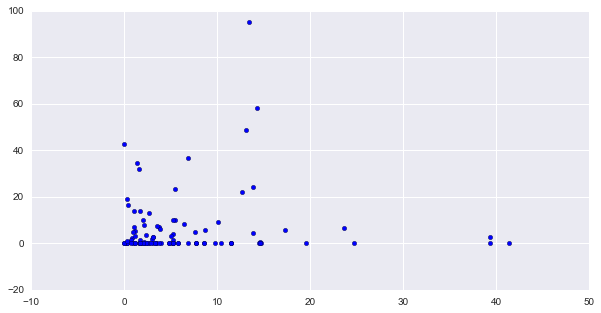

In [238]:
plt.subplots(figsize=(10,5))
plot_predict(knn, X_test, y_test)

MSE: -2191.0440882391968	std: 5397.057505770772
MAE: -11.1180399574824	std: 8.311909461431886
R2: -0.09906701113200903	std: 0.09842328883506817


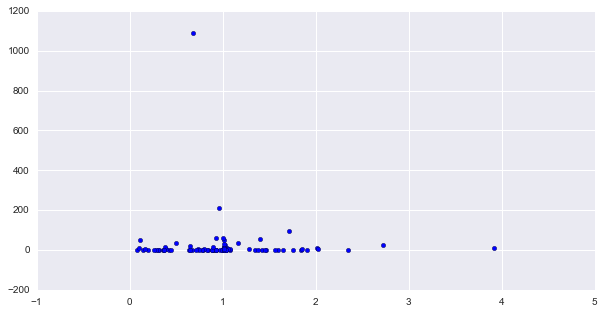

In [160]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

score(svr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(svr, X_test, y_test)

MSE: -2230.7245117217544	std: 5111.466723741079
MAE: -18.48649892107114	std: 6.227968902041859
R2: -0.3156009792171667	std: 0.5998480199615178


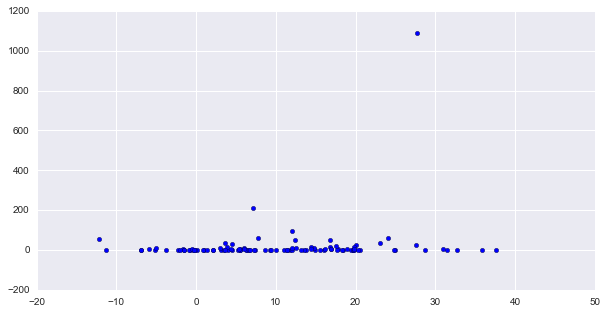

In [161]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

score(lr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(lr, X_test, y_test)

MSE: -2842.5418776324873	std: 5078.268151817923
MAE: -20.440237851730963	std: 8.696253317061258
R2: -1.4456531025542767	std: 4.440155373628714


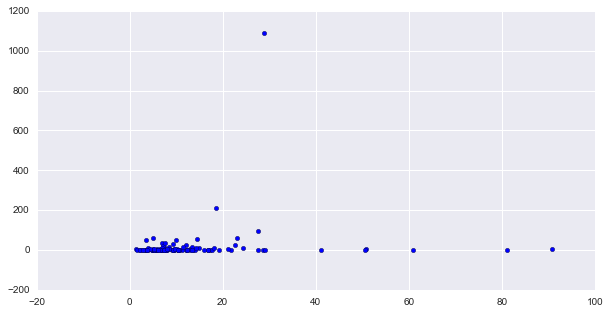

In [162]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

score(rfr, X_train, y_train)
plt.subplots(figsize=(10,5))
plot_predict(rfr, X_test, y_test)

# Тюним признаки

Почему-то сразу на неподготовленных признаках ничего не работает? Но почему?

12.8472920696
0.52
0.0
1090.84


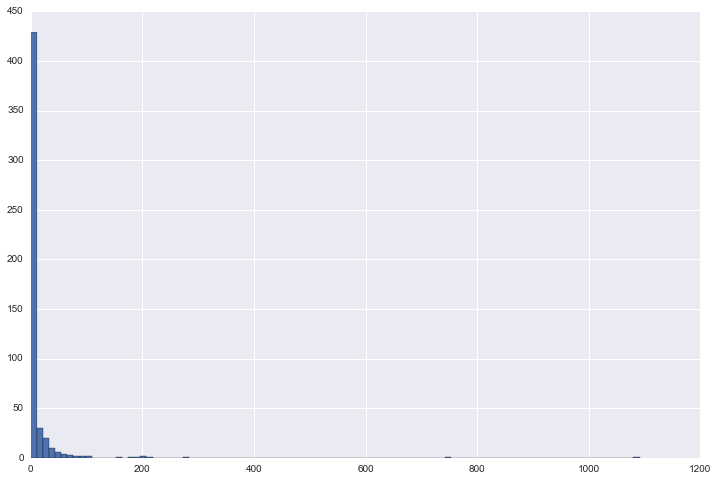

In [165]:
print(data['area'].mean())
print(data['area'].median())
print(data['area'].min())
print(data['area'].max())
plt.subplots(figsize=(12,8))
h=plt.hist(data['area'], bins=100)

In [212]:
data.groupby(['area'])['X'].count()

area
0.00       247
0.09         1
0.17         1
0.21         1
0.24         1
0.33         1
0.36         1
0.41         1
0.43         2
0.47         1
0.52         2
0.54         1
0.55         1
0.61         1
0.68         2
0.71         1
0.72         1
0.75         1
0.76         1
0.77         1
0.79         1
0.90         2
0.95         1
0.96         1
1.01         1
1.07         1
1.09         1
1.10         1
1.12         1
1.19         1
          ... 
42.87        1
43.32        1
46.70        1
48.55        1
49.37        1
49.59        1
51.78        1
54.29        1
56.04        1
58.30        1
61.13        1
64.10        1
70.32        1
70.76        1
71.30        1
82.75        1
86.45        1
88.49        1
95.18        1
103.39       1
105.66       1
154.88       1
174.63       1
185.76       1
196.48       1
200.94       1
212.88       1
278.53       1
746.28       1
1090.84      1
Name: X, dtype: int64

Целевая переменная очень сильно смещена влево и имеет длинный хвост. В таких случаях обычно помогает логарифмирование.

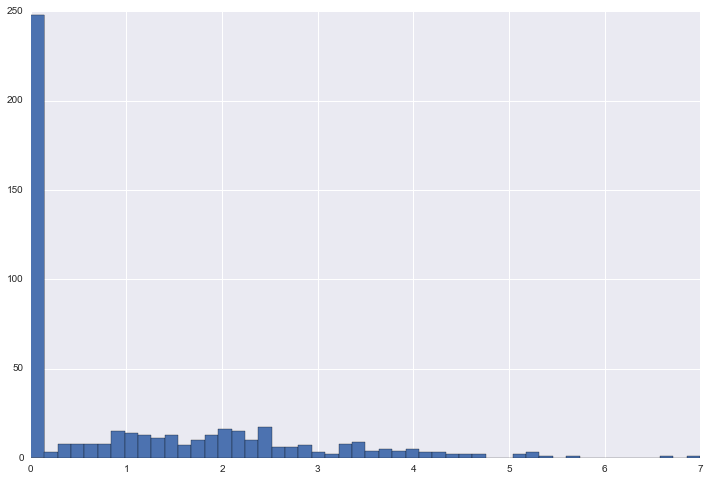

In [227]:
target = np.log(data['area'] + 1)
plt.subplots(figsize=(12,8))
h=plt.hist(target, bins=50)

In [233]:
# Выбрасываем аномалии

d = data[data['area'] < 200]
X = d.drop(['area'], axis = 1)
X = pd.get_dummies(X, columns=categorical_columns)
y = d['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:
data.groupby(['rain'])['area'].count()

rain
0.0    509
0.2      2
0.4      1
0.8      2
1.0      1
1.4      1
6.4      1
Name: area, dtype: int64

MSE: -2.1885449309288934	std: 0.45538373277030886
MAE: -1.1758089527832125	std: 0.1167364650998175
R2: -0.24568512021386774	std: 0.16560052037950346


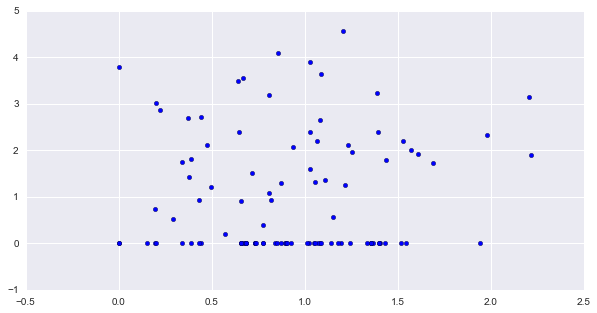

In [234]:
knr = KNeighborsRegressor()
knr.fit(X_train, np.log(y_train+1))

score(knr, X_train, np.log(y_train+1))
plt.subplots(figsize=(10,5))
plot_predict(knr, X_test, np.log(y_test+1))

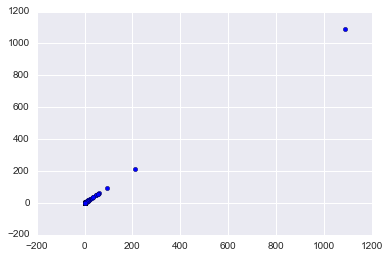

In [202]:
plt.scatter(x=np.power(np.e, np.log(y_test+1))-1, y=y_test)

214.688815412
6.35620164361


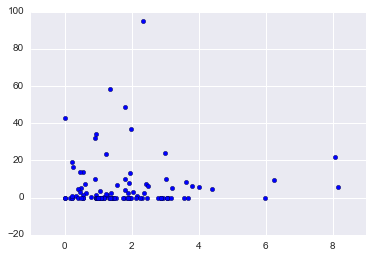

In [235]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred = np.power(np.e, knr.predict(X_test)) - 1
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))
plt.scatter(x=pred, y=y_test)

MSE: -2.155489793707822	std: 0.4115462724702841
MAE: -1.2043431795900479	std: 0.1047842375323377
R2: -0.2881470463625892	std: 0.15204151656937143


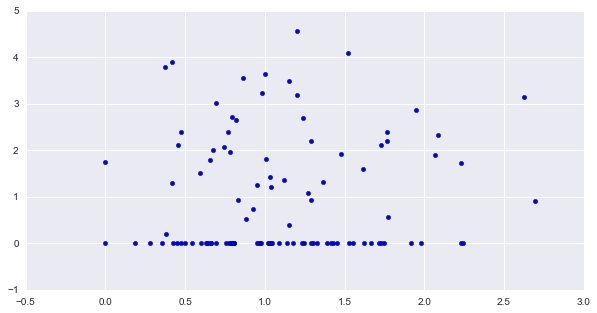

In [239]:
rfr = RandomForestRegressor()
rfr.fit(X_train, np.log(y_train+1))

score(rfr, X_train, np.log(y_train+1))
plt.subplots(figsize=(10,5))
plot_predict(rfr, X_test, np.log(y_test+1))